# Optimization for learning - FRTN50
# Assignment 1: Proximal Gradient Method


## Table of Contents

- [Introduction](#Introduction)
- [Task 1 - show convexity](#Task-1)
- [Task 2 - compute the conjugate functions](#Task-2)
- [Task 3 - find the dual problem](#Task-3)
- [Task 4 - prove smoothness](#Task-4)
- [Task 5 - subdifferentials and prox](#Task-5)
- [Task 6 - compute explicit update rules for the proximal gradient method](#Task-6)
- [Task 7 - Prove dual/primal correspondance](#Task-7)
- [Task 8 - Code the building blocks](#Task-8)
- [Task 9 - Code an optimizing algorithm for the primal](#Task-9)
- [Task 10 - Code an optimizing algorithm for the dual](#Task-10)


In [ ]:
Fill in group number and member names:

| GROUP | NAME           | TIME SPENT      |
|-------|----------------|-----------------|
| 9     | Joel Bengs     | 29 hours        |
|       | Jesper Arnwald | 29 hours        |

| September, 2023 | Time Log   |
|-----------------|------------|
| Sunday          | 7 hours    |
| Monday          | 2 hours    |
| Monday evening  | 4 hours    |
| Tuesday         | 3 hours    |
| Wednesday       | 4 hours    |
| Friday          | 4 hours    |
| Saturday        | 4 hours    |

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

## Introduction

The goal of this assignment is to become familiar with some of the steps involved in solving an optimization problem. In this assignment, you will form Fenchel dual problems, find gradients and/or proximal operators, and implement the proximal gradient method.

__Problem__ The problem we will solve is the following constrained problem

\begin{align}\label{eq:the_problem}\tag{1}
	\underset{x \in S}{\text{minimize}}\; \tfrac{1}{2}x^T Q x + q^Tx
\end{align}

where $Q\in\mathbb{S}_{++}^{n}$, $q\in\mathbb{R}^{n}$ and $S\subseteq\mathbb{R}^{n}$ is a set defined by the points $a,b\in\mathbb{R}^{n}$, $a\leq b$, such that 

\begin{align*}
	S = \{x \in \mathbb{R}^{n}: a \leq x \leq b \}.
\end{align*}

I.e., we are going to minimize a quadratic function over an $n$-dimensional box. Recall that, the vector inequality $a\leq b$ means that 

\begin{align*}
	a_{i} \leq b_{i}
\end{align*}

for each $i=1,\ldots,n$. Define the function $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ such that

\begin{align*}
	f(x) = \tfrac{1}{2}x^T Q x + q^Tx
\end{align*}

for each $x\in\mathbb{R}^{n}$ and let $\iota_{S}:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ denote the indicator function of the set $S$, i.e.,

\begin{align*}
	\iota_{S}(x) =
	\begin{cases}
		0 		& \text{if }x\in S, \\
		\infty 	& \text{if }x\in \mathbb{R}^n \setminus S.
	\end{cases}
\end{align*}

Problem \eqref{eq:the_problem} can then be written as 

\begin{align}\label{eq:the_problem_mod}\tag{2}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + \iota_{S}(x).
\end{align}

__Solution method__ To solve optimization problem \eqref{eq:the_problem_mod}, we will use the _proximal gradient method_. It solves problems of the form

\begin{align}\label{eq:pgprob}\tag{3}
	\underset{x \in \mathbb{R}^{n}}{\text{minimize}}\; f(x) + g(x) 
\end{align}

where $f:\mathbb{R}^{n}\rightarrow\mathbb{R}$ is differentiable and $g:\mathbb{R}^{n}\rightarrow\mathbb{R}\cup\{\infty\}$ is proximable, i.e., $\prox_{\gamma g}$ can be cheaply computed. The proximal gradient method (with constant step-size) is given by:

- Pick some arbitrary initial guess $x^0\in\R^{n}$ and step-size $\gamma>0$.
- For $k=0,1,2\ldots$, let 
\begin{align}\label{eq:pg}\tag{4}
				x^{k+1} = \prox_{\gamma g}\left(x^k - \gamma \nabla f(x^k)\right).
\end{align}
- Stop when $x^k$ is deemed to have converged.

In this assignment, we simply run the proximal gradient method a large fixed number of iterations and plot the norm of the fixed-point residual $\norm{x^{k+1} - x^k}_{2}$ (also known as the step-length), of each step to make sure it converges to zero. Since the experiments are run on a computer, zero means smaller than machine precision, which usually is around $10^{-15}$.

The step-size parameter $\gamma$ in the procimal gradient method will affect the convergence. It should be tuned to the problem or chosen based on properties of $f$ and $g$. In particular, suppose that $f$ and $g$ are proper, closed and convex. 
If $f$ is $\beta$-smooth for some parameter $\beta>0$, the maximal step-size to guarantee convergence is $\gamma < \frac{2}{\beta}$.

Below are the tasks that you need to solve. Keep this in mind:
- The suggested exercises in the exercise compendium found on the Canvas course page, up until and including the chapter "Proximal gradient method - basics", is relevant for this assignment. 
- Carefully motivate every step in your calculations.
- Use __figures__ and __tables__ to motivate your answers.
- Figures must have appropriately labeled axes and must be referenced in the main text.
- Your code should be written in a quite general manner, i.e., if a question is slightly modified, it should only require slight modifications in your code as well. 
- Comment your code well. 
- Make sure you plot in such a way that small quantities (e.g., $\norm{x^{k+1} - x^k}_{2}$) are visible. In particular, use log-linear plots, where the quantity that should go to $0$ is on the $y$-axis using logarithmic scale, and the iteration number $k$ on the $x$-axis using linear scale.
- What you need to submit to Canvas:
    - This jupyter notebook containing your solutions.
    - An exported pdf version of the jupyter notebook. (One way to do this is to print the notebook in your web browser, and then save as pdf.)

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task-1

Show that $f$ and $\iota_{S}$ in (2) are convex and show that constraint qualification (CQ) holds. You are allowed to assume that $\relint S \neq \emptyset$. Note that $f$ and $\iota_{S}$ also are closed, but you do not need to prove this.

__Solution:__ 

_Convexity of $f(x)$_

The function

\begin{align*}
        f(x) = \frac{1}{2} x^T Q x + q^T x
\end{align*}

is strictly convex and thus convex by second order conditions. The second order gradient of $f$ (the Hessian) is precisely $Q$:

\begin{align*}
        \nabla f(x) = Q x + q
\end{align*}

\begin{align*}
        \nabla^2 f = Q
\end{align*}

and $Q$ is a positive definite matrix by assumption of the problem.


_Convexity of $I_s$_

We first show that $S = \{x \in \mathbb{R}^{n}: a \leq x \leq b \}.$ is a convex set. Let $x_1, x_2 \in S$. Then $a \leq x_1, x_2 \leq b$. Let $\theta \in [0,1]$. Then

\begin{align*}
\theta x_1 + (1-\theta) x_2 \leq \theta b + (1-\theta) b = b 
\end{align*}
and
\begin{align*}
\theta x_1 + (1-\theta) x_2 \geq \theta a + (1-\theta) a = a 
\end{align*}

Which means that $\theta x_1 + (1-\theta) x_2 \in S$, and that $S$ is a convex set by definition of convex sets.

Now we show that the indicator function over $S$ is convex. As a first case, $x_1, x_2 \in S$ and $\theta \in [0,1]$. By convexity of $S$, $\theta x_1 + (1-\theta) x_2 \in S$ and $f(\theta x_1 + (1-\theta) x_2) = 0$. Thus the condition for convexity of f holds:

\begin{align*}
	f(\theta x_1 + (1-\theta) x_2) \leq \theta f(x_1) + (1-\theta) f(x_2)    
\end{align*}

\begin{align*}
    0 \leq 0
\end{align*}

For all other cases (Either one or both of $x_1$ and $x_2$ outside of $S$), we have infinity on the right hand side of the convexity definition, which always holds. This shows that the indicator function over S is convex.

_CQ_

We want to prove that

\begin{align*}
    \relint \dom f \cap  \relint \dom g \neq  \emptyset 
\end{align*}


Since

\begin{align*}
    \relint \dom f = \{  x| x \in \mathbb{R}^n \} 
\end{align*}

and 


\begin{align*}
    \relint \dom g \neq \emptyset
\end{align*}

because $\relint S \neq \emptyset$ and $f$ and $\iota_{S}$ also are closed, we have that

\begin{align*}
    \relint \dom f \cap  \relint \dom g \neq  \emptyset
\end{align*}

must hold.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task-2:

Compute the conjugate functions $f^\ast$ and $\iota_{S}^\ast$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.

__Solution:__ 

__Conjugate of $f$__

We will use the Fenchel Young equality to compute $f^\ast$

\begin{align*}
    f^\ast(s) = s^Tx^\ast - f(x^\ast) \iff s \in \partial f(x^\ast)
\end{align*}

Since $f$ is finite-valued, convex and differentiable, we know that the subdifferential is simply the singleton gradient

\begin{align*}
\partial f(x) = \{\nabla f(x)\}
\end{align*}

\begin{align*}
    \nabla f(x) = Qx + q
\end{align*}

\begin{align*}
    s \in \partial f(x^\ast) \iff s = Qx^\ast + q \iff Qx^\ast = s-q \iff x^\ast = Q^{-1}(s-q)
\end{align*}

Note that $Q$ is invertible as $Q$ is positive definite. This formula $x^\ast$ can be used to formulate an expression for the conjugate

\begin{align*}
    f^\ast(s) = s^Tx^\ast - f(x^\ast)
\end{align*}

\begin{align*}
    f^\ast(s) = s^TQ^{-1}(s-q) - f(Q^{-1}(s-q)) = 
\end{align*}


\begin{align*}
    s^TQ^{-1}(s-q) - \frac{1}{2}(Q^{-1}(s-q))^TQQ^{-1}(s-q) - q^TQ^{-1}(s-q) = 
\end{align*}

\begin{align*}
    (s^T-q^T)Q^{-1}(s-q) - \frac{1}{2}(s-q)^TQ^{-1T}QQ^{-1}(s-q) =
\end{align*}

\begin{align*}
    (s-q)^TQ^{-1}(s-q) - \frac{1}{2}(s-q)^TQ^{-1}(s-q) =
\end{align*}

\begin{align*}
    \frac{1}{2}(s-q)^TQ^{-1}(s-q)
\end{align*}

To summarize, we can use FY's equality and that $\partial f(x) = \{\nabla f(x)\}$ to compute the conjugate of $f$

\begin{align*}
    f^\ast (s) = \frac{1}{2}(s-q)^TQ^{-1}(s-q)
\end{align*}

__Conjugate of the indicator function $I_s$__

The indicator function of the set $S$ is given as

\begin{align*}
	\iota_{S}(x) =
	\begin{cases}
		0 		& \text{if }x\in S, \\
		\infty 	& \text{if }x\in \mathbb{R}^n \setminus S.
	\end{cases}
\end{align*}

We first show that $\iota_{S}(x)$ is seperable.


- $\iota_{S}(x)$ will only evalute to zero if all components $x_i$ of $x$ are in $S$.

 
- If any of the components are outside S, i.e. $\; x_i < a_i$ or $\; b_i < x_i\;$ for any $i = {1,\ldots,n}$, then $\iota_{S}(x) = \infty$.

- The separated version of $\iota_{S}(x)$ is $\sum_{i = 1}^{n} \iota_{[a_i,b_i]}(x_i)$.

- $\sum_{i = 1}^{n} \iota_{[a_i,b_i]}(x_i)$ will only evalute to zero if all components $x_i$ of $x$ are in $S$.

- If any of the components are outside S, i.e. $\; x_i < a_i$ or $\; b_i < x_i\;$ for any $i = {1,\ldots,n}$, then $\sum_{i = 1}^{n} \iota_{[a_i,b_i]}(x_i) = \infty$.

They are thus equal, which shows that $\iota_{S}(x)$ is a separable function:

\begin{align*}
	\iota_{S}(x) = \sum_{i = 1}^{n} \iota_{[a_i,b_i]}(x_i)
\end{align*}

We know that the conjugate of a separable function $g$ is also separable:

\begin{align*}
    g^\ast(s) = \sum_{i = 1}^{n} g_i^\ast(s_i)
\end{align*}

We use the definition of the conjugate of a function

\begin{align*}
    g_i^\ast(s_i) = \sup_{x_i \in \mathbb{R}}(s_ix_i - g_i(x_i))
\end{align*}

When $x < a_i$ or $x > b_i \implies g_i(x) = \infty \implies g_i^\ast(s) = -\infty$.

We therefore consider only $a_i \leq x \leq b_i \implies g_i(x)=0$.

\begin{align*}
    g_i^\ast(s_i) = \sup_{x \in S}(s_ix_i) = \max(a_i s_i,b_i s_i)
\end{align*}

We now use that $g(x)$ is separable, wich means that $g^\ast(s)$ is separable.

\begin{align*}
    g^\ast(s) = \sum_{i = 1}^{n} g_i^\ast(s_i)= \sum_{i = 1}^{n} \max(a_i s_i, b_i s_i)
\end{align*}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task-3:

Write down a Fenchel dual problem to (2). Show that constraint qualification for the dual problem (CQ-D) holds.

Attention/hint: Keep track of your minus signs.

__Solution:__ 

_Fenchel dual problem_

We can construct the Fenchel dual problem using it's definition
\begin{align*}
    \min_{u\in \mathbb{R}^n}(f ^\ast(-u) + g^ \ast(u)).
\end{align*}

together with the previous results

\begin{align*}
    f^\ast (-u) = \frac{1}{2}(u+q)^TQ^{-1}(u+q)
\end{align*}

\begin{align*}
    g^\ast(u) = \sum_{i = 1}^{n} \max(a_i u_i, b_i u_i)
\end{align*}

In this problem, $L = I$ and as always, $u$ is the dual varaible $u \in \partial f(Lx) $.

The dual problem is

\begin{align*}
     \min_{u\in \mathbb{R}^n}\left(\frac{1}{2}(u+q)^TQ^{-1}(u+q) + \sum_{i=1}^n \max_{u\in \mathbb{R}^n}(a_iu_i,b_iu_i)\right)
\end{align*}

_Constraint Qualification Dual (CQ-D)_

\begin{align*}
    \relint \dom (f^*) \cap  \relint \dom(g^*) \neq  \emptyset  \\
    \relint \dom (f^*) \cap  \relint \dom(g^*) = \\
    \relint \dom (f^*) \cap  \relint(\R^n) = \\
    \relint \dom (f^*) \cap  \R^n = 
\end{align*}

Since $\relint \dom (f^*) $ is $\R^n$ the last equality must be non empty. 
\begin{align*}
    \relint \dom (f^*) \cap  \R^n \neq \emptyset
\end{align*}
So CD-D holds.


$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task-4:

Show that $f$ and $f^*$ are $\beta$-, and $\beta^*$-smooth, respectively. Find expressions for the smallest such parameters $\beta$ and $\beta^*$.


_Hint:_ Later when calculating the smoothness parameters in Pyhton, make sure to read the documentation carefully so that you use the correct function.

__Solution:__ 

First we would like to show that $f$ is $\beta$-smooth 

\begin{align*}
        \nabla^2 f  \preceq \beta I
\end{align*}

We know that 
\begin{align*}
        \nabla^2 f = Q  \Rightarrow Q \preceq \beta I
\end{align*}

Since $Q$ is positive definite there exist a $\beta$ that satsifies the inequality above. 

To show that $f^*$ are $\beta^*$-smooth. We first want to show that that $f$ is $\sigma$-strongly convex and then use the Duality correspondance to show that $f^*$ are $\frac{1}{\sigma}$-smooth. According to Second-order for strong convexity $f$ is $\sigma$-strongly convex if
\begin{align*}
        \nabla^2 f \succeq \sigma I
\end{align*}

Using the same argument that Q is positive definte there must the inequality 

\begin{align*}
        Q \succeq \sigma I
\end{align*}

To find expressions for the smallest such parameters $\beta$ and $\beta^*$. We know that for $\beta$ the smallest expression must be the biggest eigenvalue of $Q$. 

\begin{align*}
        \beta = \underset{i = {1\ldots, n}}{\text{max}}\; {\lambda_i}
\end{align*}

For  $\beta^*$ the we want to minimize $\frac{1}{\sigma}$. The largest value ${\sigma}$ can take is the smallest eigenvector of $Q$. So we get

\begin{align*}
        \sigma = \underset{i = {1\ldots, n}}{\text{min}}\; {\lambda_i}
\end{align*}

\begin{align*}
        \beta^* = \frac{1}{\sigma}
\end{align*}

which we know is well-defined since $Q$ is positive definite.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
$\DeclareMathOperator*{\argmin}{argmin}$

---
### Task-5:

Compute $\nabla f$, $\nabla f^\ast$, $\prox_{\gamma\iota_{S}}$ and $\prox_{\gamma\iota_{S}^\ast}$. The final expressions are not allowed to be given implicitly via optimization problems. E.g., projection formulas must be solved explicitly.


__Solution:__

_Gradient of $f$_

\begin{align*}
    \nabla f(x) = Qx +q
\end{align*}

as per problem one on bonus assignment for week 1.


_Gradient of$f^\ast$_

\begin{align*}
    \nabla f^\ast(s) = Q^{-1}(s-q)
\end{align*}

_Prox of the indicator function: $\prox_{\gamma\iota_{S}}$_

Starting from the definition of prox of the indicator function $\iota_{S}(x)$

\begin{align*}
    \prox_{\gamma\iota_{S}} (z) = \argmin_{x\in \mathbb{R}^n}(g(x) + \frac{1}{2\gamma}\Vert x-z\Vert_2^2)
\end{align*}

Since $g(x) = \infty$ for all $x$ outside $S$, we can restrict the optimization constraint to $S$ and omit $g(x) = 0$ while $x \in S$. We have

\begin{align*}
    \prox_{\gamma\iota_{S}} (z) = \argmin_{x\in S}(\frac{1}{2\gamma}\Vert x-z\Vert_2^2)
\end{align*}

The argmin is independent of the factor $\frac{1}{2\gamma}$ and of the square

\begin{align*}
    \prox_{\gamma\iota_{S}}(z) = \argmin_{x\in S}(\Vert x-z\Vert_2)
\end{align*}

This is simply the projection of $y$ onto $S$, so

\begin{align*}
    \prox_{\gamma\iota_{S}} (z) = \Pi_S(z)
\end{align*}

Elementwise, the projection is

\begin{align*}
    \Pi_{S}(z_i) = 
    \begin{cases}
        a_i     & \text{if } z_i < a_i, \\
        b_i 	& \text{if } z_i > b_i, \\
        z_i     & \text{if } z_i \in [a_i ,b_i]
	\end{cases}
\end{align*}

_Prox of the conjugate indicator function: $\prox_{\gamma\iota_{S}^\ast}$_

Since we know that g is closed convex we can use the Moreau Decompositon to get $\prox_{\gamma\iota_{S}^\ast}$. The Moreau Decompositon is

\begin{align*}
    \prox_{\gamma\iota_{S}} (z) +  \gamma\prox_{\gamma^{-1}\iota_{S}^\ast}(\gamma^{-1}z) = z
\end{align*}

Since $\gamma\iota_{S}$ is closed convex we know:

\begin{align*}
    \gamma\iota_{S}^{\ast\ast} = \gamma\iota_{S}
\end{align*}

Combinding this gives us:

\begin{align*}
    \prox_{\gamma\iota_{S}^\ast} (z) +  \gamma\prox_{\gamma^{-1}\iota_{S}}(\gamma^{-1}z) = z
\end{align*}
\begin{align*}
    \iff
\end{align*}
\begin{align*}
    \prox_{\gamma\iota_{S}^\ast} (z)  = z - \gamma\prox_{\gamma^{-1}\iota_{S}}(\gamma^{-1}z)
\end{align*}

What is left now is to compute the right side: 
\begin{align*}
     z - \gamma\prox_{\gamma^{-1}\iota_{S}}(\gamma^{-1}z)
\end{align*}

\begin{align*}
    \iff
\end{align*}

\begin{align*}
    z - \gamma \argmin_{x \in \R^n}\left (\iota_{S}(x) + \frac{\gamma}{2} ||x - \frac{z}{\gamma}||_2^2 \right)
\end{align*}

\begin{align*}
    \iff
\end{align*}


\begin{align*}
    z -\gamma \argmin_{x \in S}(\frac{\gamma}{2} ||x - \frac{z}{\gamma}||_2^2)
\end{align*}

\begin{align*}
    \iff
\end{align*}

\begin{align*}
     z -\gamma \argmin_{x \in S}(||x - \frac{z}{\gamma}||_2)
\end{align*}

\begin{align*}
    \iff
\end{align*}

\begin{align*}
    z -\gamma \argmin_{x \in S}(||\gamma x - z||_2)
\end{align*}


\begin{align*}
    \iff
\end{align*}

\begin{align*}
    \prox_{\gamma\iota_{S}^\ast} (z) = 
    \begin{cases}
        z_i - \gamma a_i     & \text{if } z_i < \gamma a_i, \\
        z_i - \gamma b_i 	& \text{if } z_i > \gamma b_i, \\
        z_i - z_i = 0    & \text{if } z_i \in [\gamma a_i ,\gamma b_i]
	\end{cases}
\end{align*}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task-6:

Based on your results above, write explicitly out the proximal gradient update rule (4) for both the primal and the dual problem. Use $x$ as the primal variable and $\mu$ as the dual variable.

Attention/hint: Keep track of your minus signs.

__Solution:__

_The primal proximal gradient update rule_

The proximal gradient step is

\begin{align*}
    x_{k+1} = \prox_{\gamma \iota_S}(x_k - \gamma \nabla f(x_k))
\end{align*}

We use the expression for $\nabla f$, expand the $\prox$.

\begin{align*}
    x_{k+1} = \argmin _{y \in \R ^n}(\iota_S(y) + \frac{1}{2 \gamma _k} \Vert y - (x_k - \gamma_k(Qx_k + q)) \Vert_2^2)
\end{align*}

As before, the implicit problem won't find it's optimium outside of $S$ due to the indicator function, so we can optimize over $y \in S$ instead and for these $y$, $g(y) = 0$.

\begin{align*}
    x_{k+1} = \argmin _{y \in S}(\frac{1}{2 \gamma _k} \Vert y - (x_k - \gamma_k(Qx_k + q)) \Vert_2^2)
\end{align*}

Now with just one term, $\argmin _{y \in S}(\cdot)$ is independent of the scalar $ \frac{1}{2 \gamma _k} $ and the square on the norm

\begin{align*}
    x_{k+1} = \argmin _{y \in S}(\Vert y - (x_k - \gamma(Qx_k + q)) \Vert_2)
\end{align*}

To simplify notation and highlight the purpose of argmin, we denote

\begin{align*}
    x_{c} = x_k - \gamma \nabla f(x_k) = x_k - \gamma (Qx_k + q)
\end{align*}

Then the proximal gradient update rule can be expressed as

\begin{align*}
    x_{k+1} = \argmin_{y \in S}(\Vert y - x_{c} \Vert_2)
\end{align*}

If $\; x_{c} \in S \;$ then it is a valid candidate for the next step. Then $\; \argmin_{y \in S} \; $ is miminized when $\; y = x_{c} \;$ (the norm goes to zero) and the next step in the update rule is simply

\begin{align*}
    x_{k+1} = x_{c} = \gamma (Qx_k + q)
\end{align*}

When $\; x_{candidate} \;$ is outside of $S$, it's no longer a valid point since the indicator function would have reached infinity. Thus $\; argmin_{y \in S} \;$ translates the candidate point to the best possible option, that is the point $y$ that minimizes the euclidian distance $\Vert \cdot \Vert_2$ to the candidate. This point $y$ is then chosen as the final output of the current iteration:

\begin{align*}
    x_{k+1} = y = argmin_{y \in S}(\Vert y - x_{c} \Vert_2)
\end{align*}

The projection can be explicitly calculated elemetwise, as both $y$ and $x_{k+1}$ are column vectors in $\mathbb{R}^n$

\begin{align*}
    x_{k+1} = 
    \Pi_{S}(x_{c})
\end{align*}

__Dual Problem__
For the dual problem we will know that $g$ is closed convex and prox friendly & $f$ is $\sigma$-strongly convex: 
\begin{align*}
    u_{k+1} = \prox_{\gamma g^*}(u_k - \gamma \nabla f^*(u_k))
\end{align*}

From previous we know $\prox_{\gamma g^*}(z)$ and now we just need to compute $u_k - \gamma \nabla f^*(u_k)$, and we know that $f^*$ is smooth

\begin{align*}
    u_k - \gamma \nabla f^*(u_k) = u_k - \lambda_k Q^{-1}(-u_k -q) = u_k + \lambda_k Q^{-1}(u_k + q) 
\end{align*}


\begin{align*}
    \begin{cases}
    (v_k)_i = u_k + \lambda_k Q^{-1}(u_k + q) \\
    (u_{k + 1})_i  = 
    \begin{cases}
        (v_k)_i - \gamma a_i     & \text{if } (v_k)_i < \gamma a_i, \\
        (v_k)_i - \gamma b_i 	& \text{if } (v_k)_i > \gamma b_i, \\
        0    & \text{if } (v_k)_i \in [\gamma a_i ,\gamma b_i]
	\end{cases}
    \end{cases}
\end{align*}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task-7:

Suppose that $\mu^\star\in\R^{n}$ is an optimal solution to the dual problem you found in Task 3. Given $\mu^\star$, and __starting from the optimality condition for the dual problem (given by _Fermat's rule_)__, recover an optimal point $x^{\star}\in\R^{n}$ to the primal problem (2), and show that this $x^{\star}$ is in fact an optimal solution to the primal problem (2). 

__Solution:__ 

Fermat's rule says that $u^\ast$ minimizes the dual problem

\begin{align*}
    \min f^\ast(-u) + \iota_S^\ast(u)
\end{align*}

if and only if

\begin{align*}
   0 \in \partial\left(f^\ast(-u^*) + \iota_S^\ast(u^*)\right)
\end{align*}

Since both $f$ and $\iota_S$ are closed convex and CQ hold, we can use the subdifferential sum rule

\begin{align*}\tag{1}
   0 \in \partial f^\ast(-u^\ast) + \partial\iota_S^\ast(u^\ast)
\end{align*}

Which is assumed to be True (i.e. $u^\ast$ is an optimum to the dual).

We can let $0 = x^\ast - x^\ast$ to write (1) as

\begin{align*}
        x^\ast \in \partial f^\ast(-u^\ast)
\end{align*}

\begin{align*}
        x^\ast \in  \partial \iota_S^\ast(u^\ast)
\end{align*}

and the goal is now to rewrite this in therms of the primal subdifferentials, $\partial f$ and $\partial \iota_S$. We use the relations between $\partial f^\ast$ and $\partial f$, which are proven by Fenchel-Youngs inequality. The equivalence holds since $f$ and $\iota_S$ are closed convex, which has been shown before.

\begin{align*}
        x^\ast \in \partial f^\ast(-u^\ast) \; \iff \; -u^\ast \in \partial f(x^\ast)
\end{align*}

\begin{align*}
        x^\ast \in  \partial \iota_S^\ast(u^\ast) \; \iff \; u^\ast \in \partial \iota_S(x^\ast)
\end{align*}

This can be reformulated using $0 = u^\ast - u^\ast$

\begin{align*}\tag{2}
    0 \in \partial f(x^\ast) + \partial \iota_S(x^\ast)
\end{align*}

and again, since $f$ and $\iota_S$ are closed convex and CQ hold, we use the subdifferential sum rule

\begin{align*}
    0 \in \partial (f + \iota_S)(x^\ast)
\end{align*}

which by Fermat's rule is equivalente to that $x^\ast$ solves a problem of the form

\begin{align*}
    \min f(x^\ast) + \iota_S(x^\ast)
\end{align*}

which is precisely the primal problem. As there is equivalence all the way, we have now showed that $x^\ast$ is in fact an optimal solution to the primal problem.

Now let's explicitly recover $x^\ast$ as a function of $u^\ast$. As $f^\ast$ is differentiable, $\partial f = \{\nabla f\}$ uniquely determines $x^\ast$ via 

\begin{align*}
        x^\ast \in \partial f^\ast(-u^\ast) = \nabla f(-u^\ast) = Q^{-1}(-u-\iota_S)
\end{align*}

\begin{align*}
\end{align*}

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
--- 
### Task-8:

Use your results above to fill in the functions below.

__Solution:__ 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def quad(x,Q,q):
    """
    quad(x,Q,q) computes the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: (1/2)x'Qx + q'x
    """
    quadratic_term = 0.5 * np.dot(x, (Q @ x))
    linear_term = np.dot(q, x)
    return quadratic_term + linear_term

def quadconj(mu,Q,q):
    """
    quadconj(mu,Q,q) computes the conjugate function of the 
    quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    return 0.5 * np.dot(np.transpose(np.subtract(mu,q)),(np.linalg.inv(Q) @ np.subtract(mu,q)))

def box(x,a,b):
    """
    box(x,a,b) computes the indicator function of the box contraint
    [a,b]
    
    :param x: the variable of the indicator function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: 0 if x is in [a,b] and infinity otherwise
    """
    if np.all(a <= x) and np.all(x <= b):
        return 0
    else: 
        return np.Inf

def boxconj(mu,a,b):
    """
    boxconj(mu,a,b) computes the conjugate function of the indicator function 
    of the box contraint [a,b], evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: conjugate of the indicator function of the box contraint [a,b], evaluated at mu
    """  
    # Python can perform elementwise calculations that produces a new vector of the correct length
    # Then we sum the vector to a scalar
    return np.sum(np.maximum(a*mu, b*mu))

def grad_quad(x,Q,q):
    """
    grad_quad(x,Q,q) computes the gradient of the quadratic function (1/2)x'Qx + q'x
    
    :param x: the variable of the quadratic function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of (1/2)x'Qx + q'x
    """
    return Q @ x + q

def grad_quadconj(mu,Q,q):
    """
    grad_quadconj(mu,Q,q) computes the gradient of the conjugate function of the 
    the quadratic function (1/2)x'Qx + q'x, evaluated at mu
    
    :param mu: the variable of the conjugate function
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :return: gradient of the conjugate of (1/2)x'Qx + q'x, evaluated at mu
    """
    Qinv = np.linalg.inv(Q)
    return Qinv@np.subtract(-mu,q) #keep track of the minus signs!
    
def prox_box(x,a,b,gamma):
    """
    prox_box(x,a,b,gamma) computes proximal operator of the indicator function 
    of the box contraint [a,b], evaluated at x
    
    :param x: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the indicator function of the 
    box contraint [a,b], evaluated at x
    """    
    restricted_from_below_vector = np.maximum(x,a) #elementiwise, x_i is replaced by the lower box constraint
    restricted_by_box_vector = np.minimum(restricted_from_below_vector,b)
    return restricted_by_box_vector

def prox_boxconj(mu,a,b,gamma):
    """
    prox_box(mu,a,b,gamma) computes proximal operator of the conjugate function of 
    the indicator function of the box contraint [a,b], evaluated at mu
    
    :param mu: the variable of the poximal operator
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :param gamma: the step-size parameter
    :return: proximal operator of the conjugate function of the indicator function of the 
    box contraint [a,b], evaluated at mu
    """
    lower_constrained_vector = np.where(mu < gamma *a, mu - gamma * a, 0)
    box_constrained_vector = np.where(mu > gamma * b, mu - gamma * b, lower_constrained_vector)
    return box_constrained_vector

def dual_to_primal(mu,Q,q,a,b):
    """
    dual_to_primal(mu,Q,q,a,b) computes the solution x* to the primal problem 
    given a solution mu* to the dual problem.
    
    :param mu: the dual variable
    :param Q: the matrix in the quadratic function that corresponds to the quadratic form
    :param q: the vector in the quadratic function that corresponds to the linear part
    :param a: the left vector defining the box contraint
    :param b: the right vector defining the box contraint
    :return: the extracted primal variable
    """    
    return np.linalg.inv(Q) @ np.subtract(-mu,q)

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task-9:

Below is a function for generating $Q$, $q$, $a$, and $b$ that define the quadratic function $f$ and the box constraint set $S$. Use Task 8 to solve the primal problem using the proximal gradient method.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def problem_data():
    """
    problem_data() generates the problem data variables Q, q, a and b
    
    :return: (Q,q,a,b)
    """
    
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    n = 20
    Q = rs.randn(n,n)
    Q = Q.T@Q
    q = rs.randn(n)
    a = -rs.rand(n)
    b = rs.rand(n)
    return Q, q, a, b


def proximal_gradient_method(Q, q, a, b, step_size,x0 = None, max_iter=1000, tol=1e-8):
    """
    Solve a problem using proximal gradient method
    
    :param Q: Positive semi-definite matrix
    :param q: Vector
    :param a: vector
    :param b: vector
    :param step_size: Step size for the gradient update
    :param max_iter: Maximum number of iterations
    :param tol: Tolerance for stopping criterion
    
    :return: Solution vector x
    """
    if x0 is None:
        x = np.zeros_like(q)  # Default initial guess
    else:
        x = x0
    
    norms = []  # List to store norms
    
    for i in range(max_iter):
        gradient = grad_quad(x,Q, q)
        y = x - step_size * gradient
        x_new = prox_box(y, a, b, step_size)  # Projection onto the box
        
        norm_diff = np.linalg.norm(x_new - x)
        norms.append(norm_diff)  # Store the norm
        
        # Check convergence
        if norm_diff < tol:
            break
        
        x = x_new

    return x, i, norms

(Q,q,a,b) = problem_data()

eigenvalues = np.linalg.eigvals(Q)
largest_eigenvalue = np.max(eigenvalues)
smallest_eigenvalue = np.min(eigenvalues)

print("Largest eigenvalue: ", largest_eigenvalue)
print("Smallest eigenvalue: ", smallest_eigenvalue)

Largest eigenvalue:  66.52582798067438
Smallest eigenvalue:  0.0634663229948203


__a)__ What seems to be the best choice of $\gamma$? 

__Solution:__ 

From the graph below the best choice of $\gamma$ 0.035 since it converges the fastest and if we increase the step size to 0.036 it converges.

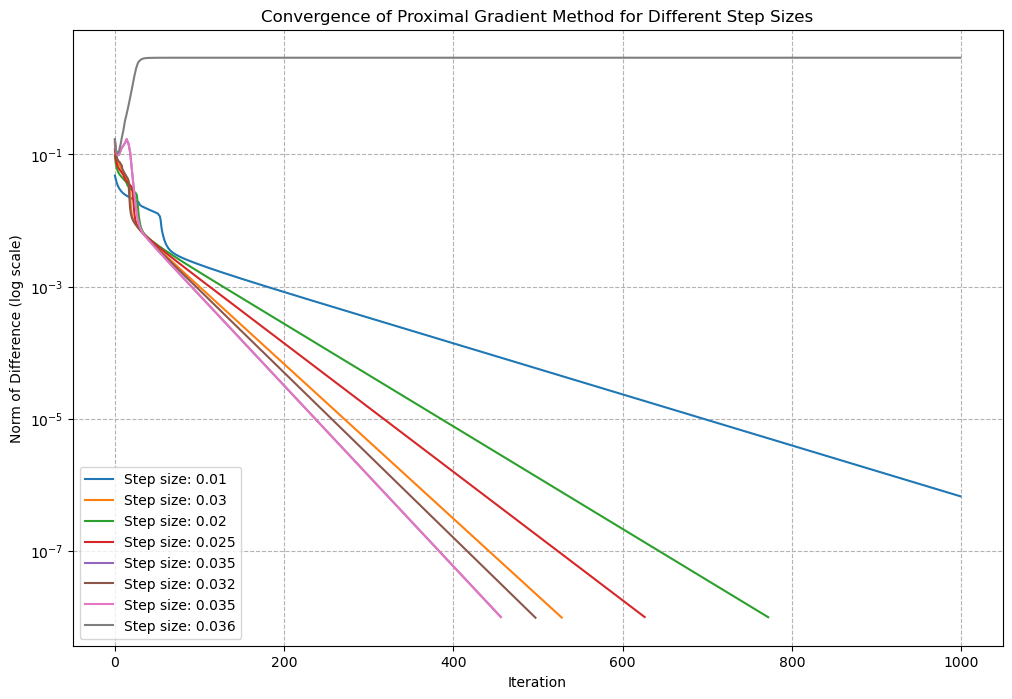

In [21]:
step_sizes = [0.01, 0.03, 0.02, 0.025, 0.035, 0.032, 0.035, .036]

plt.figure(figsize=(12, 8)) 

for step_size in step_sizes:
    final_x, last_iter, norms = proximal_gradient_method(Q, q, a, b, step_size)
    
    # Plotting
    plt.plot(norms, label=f"Step size: {step_size}")

plt.xlabel('Iteration')
plt.ylabel('Norm of Difference (log scale)')
plt.title('Convergence of Proximal Gradient Method for Different Step Sizes')
plt.yscale('log')  # Setting y-axis to logarithmic scale
plt.legend()
plt.grid(True, which="both", ls="--", c='0.7')  # Enhanced grid for log scale
plt.show()

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__b)__ Does the upper bound $\gamma < \frac{2}{\beta}$ seem reasonable?

__Solution:__ 

It seems very reasonable since the smallest eigenvalue of Q is 66 so that means our $\gamma$ should be less than 0.03 which in our case is almost true. That it works up to 0.035 I would say is because of our starting point. 

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

Test different initial points for the algorithm:

__c)__ Does this affect the point the algorithm converges to? 

__Solution:__ 
No, the algorithm converges to the optimal solution independent of starting point, given a converging step size. If using the step size 0.03 we see that all starting points converges. If we then compare the final x values for each starting point we can see that the max norm is 7.49979530836136e-07. So the starting point does not affect the point the algorithm converges to. 

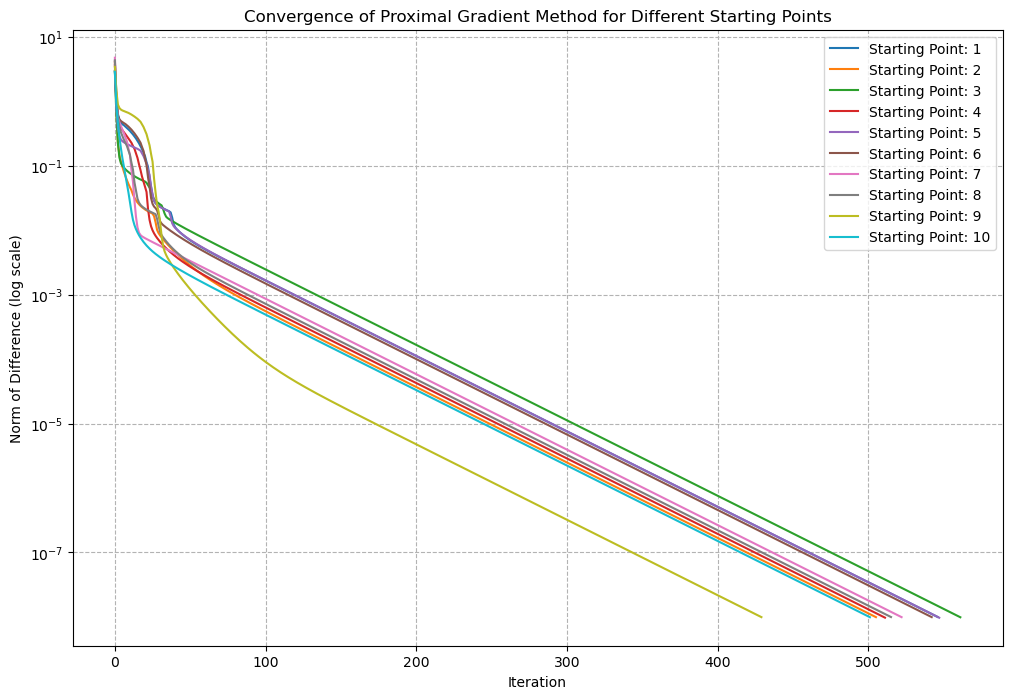

Maximum norm of difference: 7.49979530836136e-07


In [22]:
np.random.seed(10) 

num_start_points = 10
starting_points = [np.random.randn(q.shape[0]) for i in range(num_start_points)]
final_points = []
plt.figure(figsize=(12, 8))

for idx, x0 in enumerate(starting_points):
    final_x, last_iter, norms = proximal_gradient_method(Q, q, a, b, 0.03, x0=x0) 
    plt.plot(norms, label=f"Starting Point: {idx+1}")
    final_points.append(final_x)

plt.xlabel('Iteration')
plt.ylabel('Norm of Difference (log scale)')
plt.title('Convergence of Proximal Gradient Method for Different Starting Points')
plt.yscale('log')
plt.legend()
plt.grid(True, which="both", ls="--", c='0.7')
plt.show()

norm_diff_list = []  # List to store all norms of differences
# Compute the norms of differences between the final points
for i in range(len(final_points)):
    for j in range(i+1, len(final_points)):
        diff = final_points[i] - final_points[j]
        norm_diff = np.linalg.norm(diff)
        norm_diff_list.append(norm_diff)

print(f"Maximum norm of difference: {max(norm_diff_list)}")

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__d)__ Carefully motivate theoretically why/why not it affects the final point. _Hint:_ Look at the objective function in (2).

__Solution:__ 

We know $f$ is strongly convex and $\iota_S$ is convex so our objective function is a sum of a strong convex and a convex function and therefore strongly convex. S is a closed set and therefore the objective function has a uniqe minimum. Since the minimum is unique and the algorithm is guaranteed to converge, it will always converge to the unique minimum.    

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__e)__ Does your final point $x^{\text{final}}$ satisfy the constraint $x^{\text{final}} \in S$?

__Solution:__ 

_Fill in your solution here!_

yes :(

In [5]:
box(final_x,a,b)

0

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$

__f)__ What about the iterates, do they always satisfy the constraint, $x^k \in S$? Why/why not?

__Solution:__ 

_Fill in your solution here!_

Yess they should always be in the box since from

\begin{align*}
    x_{k+1} = y = argmin_{y \in S}(\Vert y - x_{candidate} \Vert_2)
\end{align*}

Each iteration is a projection on the set S.

$\DeclareMathOperator{\prox}{prox}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\Sym}{\mathbb{S}}$
$\newcommand{\norm}[1]{\lVert{#1}\rVert}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator{\relint}{relint}$
$\DeclareMathOperator{\dom}{dom}$
---
### Task-10 - Solve the dual problem. 

__a)__ Similar to the previous task, find/verify the upper bound on the step-size and find a good step-size choice.

Solution: 0.127 is a good step size, it's as large as possible while it guarantees convergence.

Let $x^{\text{final}}$ be the final points from Task 9 and $\mu^{\text{final}}$ the final point for the dual problem. Let $\hat{x}^{\text{final}}$ final primal points extracted from the final dual point $\mu^{\text{final}}$ using the expression from Task 7:

__b)__ Are $x^{\text{final}}$ and $\hat{x}^{\text{final}}$ the same?

Solution: Yes, the are equal to machine precision.
  
__c)__ Is $\hat{x}^{\text{final}}$ in the box $S$? 
 
__d)__ Let $\mu^k$ be the iterates of the dual method, using the expression from Task 7, extract the primal iterates $\hat{x}^k$ from $\mu^k$. Does $\hat{x}^k$ always satisfy the constraint $\hat{x}^k \in S$?

__e)__ How do the function values $f\left(\hat{x}^k\right)$ develop over the iterations?

__f)__ What about $f\left(\hat{x}^k\right)+\iota_{S}\left(\hat{x}^k\right)$?


__Solution:__ Run the two cells cell below, which prints the solution to all questions. 

In [23]:
# Define the proximal gradient method for the dual problem
def dual_proximal_gradient_method(Q, q, a, b, u0, gamma, max_iter, tol):
    """
    Solve a dual problem using proximal gradient method
    
    :param Q: Positive semi-definite matrix
    :param q: Vector
    :param a: Real valued vector
    :param b: Real valued vector
    :param gamma: Step size for the gradient update
    :param max_iter: Maximum number of iterations
    :param tol: Tolerance for stopping criterion
    
    :return u: Solution vector
    :return i: iterations
    :return u_iterations: vector of steps
    :return u_norms: norm of vector of steps
    :return 
    """
    u = u0
    u_iterations = []
    u_norms = []
    
    for i in range(max_iter):
        z = u + gamma * grad_quadconj(u,Q,q) #plus gamma... not minus
        u_new = prox_boxconj(z,a,b,gamma)
        u_iterations.append(u_new)
        norm_diff = np.linalg.norm(u_new - u)
        u_norms.append(norm_diff) #Store the norm for plotting
        if norm_diff < tol:
            break   
        u = u_new         
    return u, i, u_iterations, u_norms

def problem_data():
    """
    problem_data() generates the problem data variables Q, q, a and b
    
    :return: (Q,q,a,b)
    """
    rs = np.random.RandomState(np.random.MT19937(np.random.SeedSequence(1)))
    n = 20
    Q = rs.randn(n,n)
    Q = Q.T@Q
    q = rs.randn(n)
    a = -rs.rand(n)
    b = rs.rand(n)
    return Q, q, a, b

TASK 10A - STEP LENGHT

We calculate the theoreticaly largest step size according to Task 6. It should be twice the smallest eigenvalue of Q

The smallest eigenvalue is:  0.0635

Gamma is then limited by: 0.127
Below, eight gammas  [0.097 0.117 0.122 0.127 0.13  0.132 0.137 0.142]  distributed around the theoretical gamma are plotted, each from 10 starting points


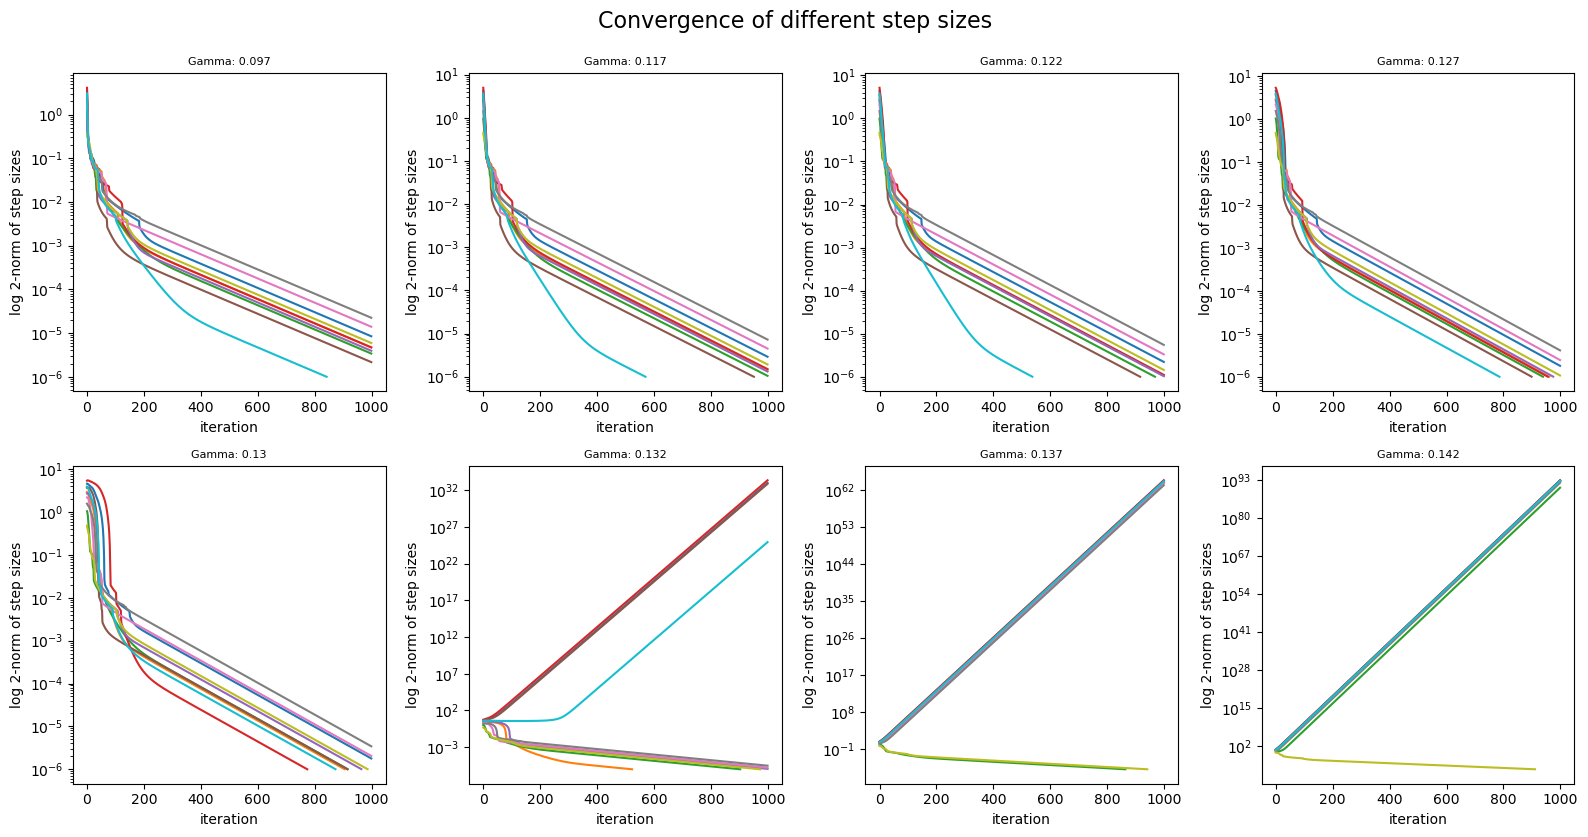


It is evident that the theory holds. When the step size gamma is limited by the smoothness constant (gamma = 0.127),
the algorithm converges for all sampled starting points. When gamma is increased slightly to 0.13,
the algorithm still converges. This is a consequence of Beta being a conservative global estimate of smoothness.
Locally, the function is even smoother allowing for larger steps. When gamma is increased further, we observe
divergence for some starting points, but nog necesarrialy all - again due to greater local smoothness.

To summarize, we proceed with gamma = 0.127 to guarantee convergence.

We now proceed to task 10b: extracting the primal optimum from the dual optimum.

We denote x_final as the optimum from the primal algoithm, u_final as the optimum from the dual algorithm,
and x_hat_final as the primal optimum, extracted from the dual optimum.

An interesting observation is that in the previous graphs, the dual algorithm did not have time to reach the
tolerance with

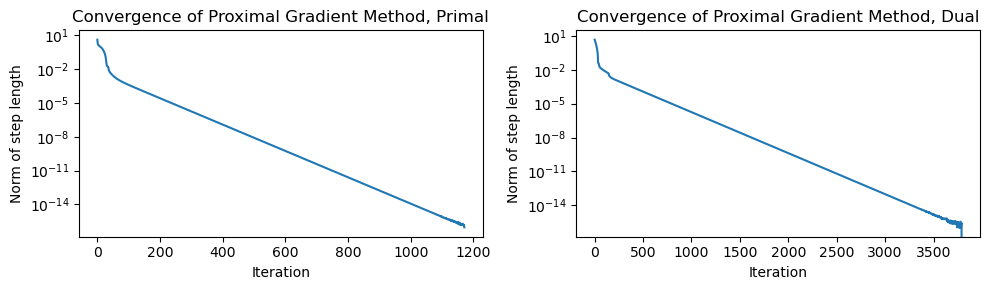


In the plots above we can observe that the primal and the dual algorithms convergences respectively.
The primal algorithm iterated,  1171  times and the dual iterated  3790  times to reach convergence.
The first five coordinates of the optimal points are

x_final:  [-0.25374054  0.22842393  0.25765564 -0.2089593   0.14902594]
u_final:  [-1.17512072  0.          0.         -1.19820935  0.        ]
x_hat_final:  [-0.25374054  0.22842393  0.25765564 -0.2089593   0.14902594]

and the 2-norm of x_final minus x_hat_final is  6.913738182804461e-15  which is zero by machine precision.

The two solutions can thus be considered equal, and the theory holds!

TASK 10C - RECOVERED SOLUTION OUTSIDE S?
We can test if the primal solution, recovered from the optimal, is in the set S
by simply observing the indicator functions value at the point. It is:

Indicator of x_hat_final =  inf

And so the point is not in S. It can be observed that the primal solution x_final is in fact in S:

Indicator of x_fi

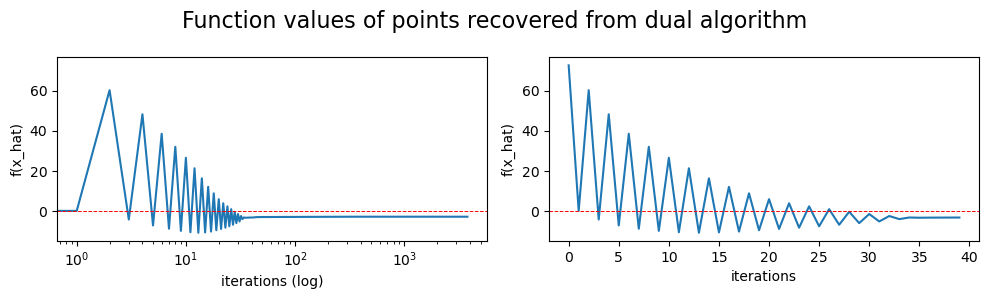


TASK 10f - FUNCTION VALUES F + G OF DUAL ITERATIONS?

We apply the same methodology, but with g(x) included. Now g(x) will contribute with infinity for all points,
as all points are outside S by previous investigation, so the sum is simply infinity for all points. Lets have a look
at the first five outputs:

f(x) + g(x) = [inf, inf, inf, inf, inf]

again, confirming the previous conclusions

In summary, the optimization problem could be solved both via the primal problem and via the dual problem.
The proximal gradient method is a solid method under the right circumstances and as such a good tool
alongside other methods, such as Newton's or ADAM.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate 10 starting points

#Initialize problem:
(Q,q,a,b) = problem_data() #defined in Task 9
max_iter =1000
tol = 1e-06

#Generate 10 starting points
np.random.seed(42)  # You can use any integer value as the seed
num_start_points = 10
starting_points = [np.random.randn(q.shape[0]) for i in range(num_start_points)]

# Task 10a - step length
print("TASK 10A - STEP LENGHT")

# Calculate candidate gammas from theoretical max gamma
smallest_eigval = np.round(min(np.linalg.eigvals(Q)), 4)
gamma_theory = 2 * smallest_eigval
uniform_values = np.round([gamma_theory -0.03, gamma_theory -0.01, gamma_theory -0.005, gamma_theory, gamma_theory + 0.003, gamma_theory + 0.005, gamma_theory +0.01, gamma_theory + 0.015], 4)

print("\nWe calculate the theoreticaly largest step size according to Task 6. It should be twice the smallest eigenvalue of Q")
print("\nThe smallest eigenvalue is: ", smallest_eigval)
print("\nGamma is then limited by:", gamma_theory)
print("Below, eight gammas ", uniform_values, " distributed around the theoretical gamma are plotted, each from 10 starting points")
    
# Create a subplot
_, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns

# Realize the algoritm
for idx, gamma in enumerate(uniform_values):
    for u0 in starting_points:
        u, _, _, u_norms = dual_proximal_gradient_method(Q, q, a, b, u0, gamma, max_iter, tol)

        subplot = axes.flatten()[idx]
        subplot.plot(u_norms, label=f"gamma: {gamma}") 
        subplot.set_title(f'Gamma: {gamma}', fontsize=8)
        subplot.set_xlabel("iteration")
        subplot.set_ylabel("log 2-norm of step sizes")
        subplot.set_yscale("log")


#Subplot control
plt.tight_layout()
plt.suptitle("Convergence of different step sizes", fontsize=16, y = 1.04)
plt.show()

print("""
It is evident that the theory holds. When the step size gamma is limited by the smoothness constant (gamma = 0.127),
the algorithm converges for all sampled starting points. When gamma is increased slightly to 0.13,
the algorithm still converges. This is a consequence of Beta being a conservative global estimate of smoothness.
Locally, the function is even smoother allowing for larger steps. When gamma is increased further, we observe
divergence for some starting points, but nog necesarrialy all - again due to greater local smoothness.

To summarize, we proceed with gamma = 0.127 to guarantee convergence.

We now proceed to task 10b: extracting the primal optimum from the dual optimum.

We denote x_final as the optimum from the primal algoithm, u_final as the optimum from the dual algorithm,
and x_hat_final as the primal optimum, extracted from the dual optimum.

An interesting observation is that in the previous graphs, the dual algorithm did not have time to reach the
tolerance withing 1000 iterations. At a concervative step size of 0.097, only one realization reached the tolerance
(the turquoise line). With larger step sizes, more and more realizations could reach the tolreance as the algorithm
did faster improvements. Of course, we could observe divergence when going too far. We now decrease
tolreance to 1e-16 to be able to reach machine precision, and we must increase the allowed
number of iterations from 1000 to ~5000, so that the algorithms has time to converge with enough precision.

In calculations, we use the first of the previous starting points as initial guess 
(which is not the lucky case of the turquoise starting point from before).
""")

# Task 10b - primal recovery from the dual
print("TASK 10B -  PRIMAL RECOVERY FROM THE DUAL")

gamma = 0.127
gamma_primal = 0.03
tol = 1e-16
x0 = u0 = starting_points[0]
max_iter = 5000

x_final, i_p, norms_primal = proximal_gradient_method(Q, q, a, b, gamma_primal, x0, max_iter, tol)
u_final, i_u, u_iterations, u_norms = dual_proximal_gradient_method(Q, q, a, b, u0, gamma, max_iter, tol)
x_hat_final = dual_to_primal(u_final,Q,q,a,b)
x_norm = np.linalg.norm(np.subtract(x_hat_final,x_final), ord=2)

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
# Plot the first graph
plt.plot(norms_primal)
plt.xlabel('Iteration')
plt.ylabel('Norm of step length')
plt.yscale("log")
plt.title('Convergence of Proximal Gradient Method, Primal')
# Move to the second subplot
plt.subplot(1, 2, 2)
# Plot the second graph
plt.plot(u_norms)
plt.xlabel('Iteration')
plt.ylabel('Norm of step length')
plt.yscale("log")
plt.title('Convergence of Proximal Gradient Method, Dual')
plt.tight_layout()
plt.show()

print("\nIn the plots above we can observe that the primal and the dual algorithms convergences respectively.")
print("The primal algorithm iterated, ", i_p, " times and the dual iterated ", i_u," times to reach convergence.")
print("""The first five coordinates of the optimal points are\n""")
print("x_final: ", x_final[:5])
print("u_final: ", u_final[:5])
print("x_hat_final: ", x_hat_final[:5])
print("\nand the 2-norm of x_final minus x_hat_final is ", x_norm, " which is zero by machine precision.")
print("\nThe two solutions can thus be considered equal, and the theory holds!")

# Task 10c - recovery outside S
print("\nTASK 10C - RECOVERED SOLUTION OUTSIDE S?")
print("""We can test if the primal solution, recovered from the optimal, is in the set S
by simply observing the indicator functions value at the point. It is:""")
print("\nIndicator of x_hat_final = ", box(x_hat_final,a,b))
print("\nAnd so the point is not in S. It can be observed that the primal solution x_final is in fact in S:")
print("\nIndicator of x_final = ", box(x_final,a,b))
print("""
And since they are equal down to machine precision (by previous theory), it can be concluded
that the optimum is at the boundary of S, and the converted dual solution must be approaching the actuall optimum
from outside of S, only to reach S at the limit.
""")
      
# Task 10d - recovery outside S
print("\nTASK 10D - DUAL ITERATIONS OUTSIDE S?")
print("""
We recover the iteration steps form the dual algorithm, and convert each of them to the primal values.
Then we pass them to the box function over the set S, and observe how many points lie inside of S""")
x_hat_iterations = [dual_to_primal(u,Q,q,a,b) for u in u_iterations]
x_hat_values = [box(x_hat,a,b) for x_hat in x_hat_iterations]

count_of_zeros = sum(1 for value in x_hat_values if value == 0)
print(f'There were a total of {len(x_hat_iterations)} iterative points. Out of them, {len(x_hat_iterations) - count_of_zeros} lied outside of S and {count_of_zeros} lied in the Set S.')
if (count_of_zeros == 0):
    print("""So we can conclude that the primal correspndance of the dual algorithm always lies
outside of $S$ unless our initial guess lies inside $S$, but approaches it as the algorithm converges, only to reach the boundary of S in the limit.""")
    
# Task 10e
print("\nTASK 10E - FUNCTION VALUES F OF DUAL ITERATIONS?")
print("""
We use the recovered primal iterations and plot their function value.
Note that convergence occurs already after 40 iterations! The function value is slightly less than zero""")

f_x_hat_iterations = [quad(x_hat,Q,q) for x_hat in x_hat_iterations]
f_x_hat_iterations_short = f_x_hat_iterations[:40]

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(f_x_hat_iterations)
plt.xscale("log")
plt.xlabel("iterations (log)")
plt.ylabel("f(x_hat)")
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.7)

plt.subplot(1, 2, 2)
plt.plot(f_x_hat_iterations_short)
#plt.xscale("log")
plt.xlabel("iterations")
plt.ylabel("f(x_hat)")
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.7)

plt.suptitle("Function values of points recovered from dual algorithm", fontsize=16)
plt.tight_layout()
plt.show()


# Task 10f
print("\nTASK 10f - FUNCTION VALUES F + G OF DUAL ITERATIONS?")
print("""
We apply the same methodology, but with g(x) included. Now g(x) will contribute with infinity for all points,
as all points are outside S by previous investigation, so the sum is simply infinity for all points. Lets have a look
at the first five outputs:
""")

f_x_hat_iterations_short = [quad(x_hat,Q,q) + box(x_hat,a,b) for x_hat in x_hat_iterations[:5]]
print(f'f(x) + g(x) = {f_x_hat_iterations_short}')
print("\nagain, confirming the previous conclusions")
print("""
In summary, the optimization problem could be solved both via the primal problem and via the dual problem.
The proximal gradient method is a solid method under the right circumstances and as such a good tool
alongside other methods, such as Newton's or ADAM.""")

In [ ]:
reset()